## Analise Exploratoria 

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
!pip install fastparquet

**Importando e Tratando Dados - Clientes**

In [3]:
clientes=pd.read_csv('customer.csv') 

In [4]:
clientes.shape

(407, 15)

In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    407 non-null    int64 
 1   namestyle     407 non-null    bool  
 2   title         404 non-null    object
 3   firstname     407 non-null    object
 4   middlename    241 non-null    object
 5   lastname      407 non-null    object
 6   suffix        23 non-null     object
 7   companyname   407 non-null    object
 8   salesperson   407 non-null    object
 9   emailaddress  407 non-null    object
 10  phone         407 non-null    object
 11  passwordhash  407 non-null    object
 12  passwordsalt  407 non-null    object
 13  rowguid       407 non-null    object
 14  modifieddate  407 non-null    object
dtypes: bool(1), int64(1), object(13)
memory usage: 45.0+ KB


In [6]:
clientes.head(1)

,customerid,namestyle,title,firstname,middlename,lastname,suffix,companyname,salesperson,emailaddress,phone,passwordhash,passwordsalt,rowguid,modifieddate
0,29485,False,Ms.,Catherine,R.,Abel,NaN,Professional Sales and Service,adventure-works\linda3,catherine0@adventure-works.com,747-555-0171,zh3goJUbYsPv92k4bVZuJtlLHwuvpQtu6uNcjkKSdF8=,rpyd5Tw=,392ae773-d7ec-48ac-b8d0-6e65b770285c,2009-05-16 16:33:33.077


In [7]:
clientes['middlename'].fillna(value = " ", inplace = True)

In [8]:
clientes["fullname"] = clientes["firstname"] + " " + clientes["middlename"] + " " + clientes["lastname"]

In [9]:
clientes=clientes.drop(columns=['namestyle', 'title', 'firstname', 'middlename', 'lastname', 'suffix', 'emailaddress', 'phone',
                               'companyname', 'emailaddress', 'passwordhash', 'passwordsalt'])

In [10]:
clientes=clientes[['customerid', 'fullname', 'salesperson', 'modifieddate', 'rowguid']]

In [11]:
clientes.shape

(407, 5)

In [12]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    407 non-null    int64 
 1   fullname      407 non-null    object
 2   salesperson   407 non-null    object
 3   modifieddate  407 non-null    object
 4   rowguid       407 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.0+ KB


In [13]:
clientes=clientes.rename(columns={'customerid': 'id_cliente', 'fullname': 'nome_cliente', 'salesperson': 'vendedor',
                        'modifieddate': 'data_saida', 'rowguid': 'guia_linha' })

In [14]:
clientes.head(1)

,id_cliente,nome_cliente,vendedor,data_saida,guia_linha
0,29485,Catherine R. Abel,adventure-works\linda3,2009-05-16 16:33:33.077,392ae773-d7ec-48ac-b8d0-6e65b770285c


In [15]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    407 non-null    int64 
 1   nome_cliente  407 non-null    object
 2   vendedor      407 non-null    object
 3   data_saida    407 non-null    object
 4   guia_linha    407 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.0+ KB


**Importando e Tratando Dados - Produtos**

In [16]:
produtos=pd.read_csv('product.csv') 

In [17]:
produtos.shape

(295, 17)

In [18]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   productid               295 non-null    int64  
 1   name                    295 non-null    object 
 2   productnumber           295 non-null    object 
 3   color                   245 non-null    object 
 4   standardcost            295 non-null    float64
 5   listprice               295 non-null    float64
 6   size                    211 non-null    object 
 7   weight                  198 non-null    float64
 8   productcategoryid       295 non-null    int64  
 9   productmodelid          295 non-null    int64  
 10  sellstartdate           295 non-null    object 
 11  sellenddate             98 non-null     object 
 12  discontinueddate        0 non-null      float64
 13  thumbnailphoto          0 non-null      float64
 14  thumbnailphotofilename  295 non-null    ob

In [19]:
produtos.head(1)

,productid,name,productnumber,color,standardcost,listprice,size,weight,productcategoryid,productmodelid,sellstartdate,sellenddate,discontinueddate,thumbnailphoto,thumbnailphotofilename,rowguid,modifieddate
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.31,1431.5,58,1016.04,18,6,2002-06-01 00:00:00.000,NaN,NaN,NaN,no_image_available_small.gif,43dd68d6-14a4-461f-9069-55309d90ea7e,2008-03-11 10:01:36.827


In [20]:
produtos=produtos.drop(columns=['productnumber', 'color', 'size', 'weight', 'productcategoryid',
                                'productmodelid', 'sellstartdate', 'sellenddate', 'discontinueddate', 'thumbnailphoto',
                               'thumbnailphotofilename'])

In [21]:
produtos.shape

(295, 6)

In [22]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productid     295 non-null    int64  
 1   name          295 non-null    object 
 2   standardcost  295 non-null    float64
 3   listprice     295 non-null    float64
 4   rowguid       295 non-null    object 
 5   modifieddate  295 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ KB


In [23]:
produtos=produtos.rename(columns={'productid': 'id_produto', 'name': 'nome_produto', 'listprice': 'preco',
                        'modifieddate': 'data_saida', 'rowguid': 'guia_linha' })

In [24]:
produtos.head(1)

,id_produto,nome_produto,standardcost,preco,guia_linha,data_saida
0,680,"HL Road Frame - Black, 58",1059.31,1431.5,43dd68d6-14a4-461f-9069-55309d90ea7e,2008-03-11 10:01:36.827


In [25]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_produto    295 non-null    int64  
 1   nome_produto  295 non-null    object 
 2   standardcost  295 non-null    float64
 3   preco         295 non-null    float64
 4   guia_linha    295 non-null    object 
 5   data_saida    295 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ KB


**Importando e Tratando Dados - Vendas**

In [26]:
vendas=pd.read_csv('salesorderdetail.csv') 

In [27]:
vendas.shape

(542, 9)

In [28]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   salesorderid        542 non-null    int64  
 1   salesorderdetailid  542 non-null    int64  
 2   orderqty            542 non-null    int64  
 3   productid           542 non-null    int64  
 4   unitprice           542 non-null    float64
 5   unitpricediscount   542 non-null    float64
 6   linetotal           542 non-null    float64
 7   rowguid             542 non-null    object 
 8   modifieddate        542 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 38.2+ KB


In [29]:
vendas=vendas.drop(columns=['salesorderdetailid'])

In [30]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salesorderid       542 non-null    int64  
 1   orderqty           542 non-null    int64  
 2   productid          542 non-null    int64  
 3   unitprice          542 non-null    float64
 4   unitpricediscount  542 non-null    float64
 5   linetotal          542 non-null    float64
 6   rowguid            542 non-null    object 
 7   modifieddate       542 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 34.0+ KB


In [31]:
vendas=vendas.rename(columns={'salesorderid': 'id_venda', 'orderqty': 'quantidade_vendida', 'productid': 'id_produto',
                            'unitprice': 'preco_unitario', 'unitpricediscount': 'desconto', 'linetotal': 'valor_arrecadado',
                            'modifieddate': 'data_saida', 'rowguid': 'guia_linha' })

In [32]:
vendas.head(1)

,id_venda,quantidade_vendida,id_produto,preco_unitario,desconto,valor_arrecadado,guia_linha,data_saida
0,71774,1,836,356.898,0.0,356.898,e3a1994c-7a68-4ce8-96a3-77fdd3bbd730,2008-06-01 00:00:00.000


In [33]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venda            542 non-null    int64  
 1   quantidade_vendida  542 non-null    int64  
 2   id_produto          542 non-null    int64  
 3   preco_unitario      542 non-null    float64
 4   desconto            542 non-null    float64
 5   valor_arrecadado    542 non-null    float64
 6   guia_linha          542 non-null    object 
 7   data_saida          542 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 34.0+ KB


**Insights**

In [34]:
# Numero de Produtos para Venda
vendas.groupby('id_produto')[['quantidade_vendida']].sum()

,quantidade_vendida
id_produto,
707,35
708,51
711,38
712,52
714,26
715,51
716,14
717,3
718,3


In [35]:
nomes_clientes = clientes.nome_cliente.nunique()
print("Numero de clientes diferentes :", nomes_clientes)

Numero de clientes diferentes : 407


In [36]:
# Configurações dos gráficos
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

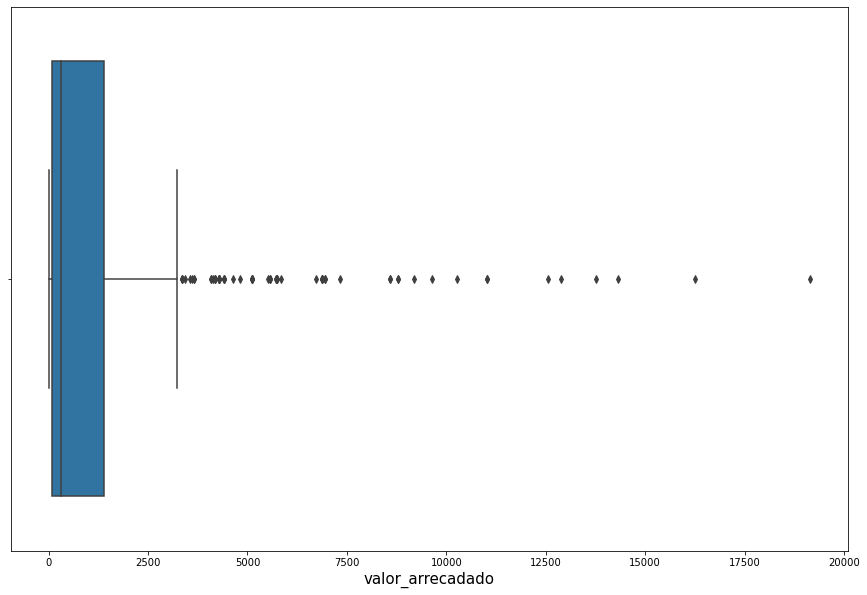

In [37]:
# Identificando outliers nos valores de vendas
sns.boxplot(x = vendas['valor_arrecadado'])
plt.show()

**Salvando DataFrame Pandas em Parquet**

In [41]:
vendas.to_parquet('vendas.parquet', engine='fastparquet')

In [42]:
clientes.to_parquet('clientes.parquet', engine='fastparquet')

In [43]:
produtos.to_parquet('produtos.parquet', engine='fastparquet')

**Conclusoes**

1. Nao esgotamos aqui as possibilidades em funcao de tempo e dedicacao da analise. 
2. O objetivo foi apenas o demosntras as possibilidades para tratamento e enriquecimentos dos dados dentro de nossa proposta de arquitetura para o caminho dos dados nas camadas RAW, Trusted e Refined de nosso Data Lake.

**Cezar Augusto Meira Carmo - cezaraugustomeiracarmo@gmail.com**